In [122]:
import vrep
import sys
import time
import numpy as np

import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [123]:
DESTINATION_POINT = 0.1

In [124]:
# # Triangular membership function

# distance = ctrl.Antecedent(np.arange(0, 1.5, 0.1), 'distance')
# speed = ctrl.Consequent(np.arange(0, 1.5, 0.1), 'speed')

# distance['close'] = fuzz.trimf(distance.universe, [0, 0, 0.6])
# distance['medium'] = fuzz.trimf(distance.universe, [0.4, 0.75, 1.1])
# distance['far'] = fuzz.trimf(distance.universe, [0.9, 1.5, 1.5])

# distance.view()

# speed['low'] = fuzz.trimf(speed.universe, [-1000, -500, 0.5])
# speed['medium'] = fuzz.trimf(speed.universe, [0.2, 0.7, 1.2])
# speed['high'] = fuzz.trimf(speed.universe, [0.7, 1, 1.3])

# speed.view()

# rule1 = ctrl.Rule(distance['close'], speed['low'])
# rule2 = ctrl.Rule(distance['medium'], speed['medium'])
# rule3 = ctrl.Rule(distance['far'], speed['high'])

# control_system = ctrl.ControlSystem([rule1, rule2, rule3])
# control = ctrl.ControlSystemSimulation(control_system)

# control.input['distance'] = 1.3  # random value
# control.compute()
# print(control.output['speed'])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.06666666666666668


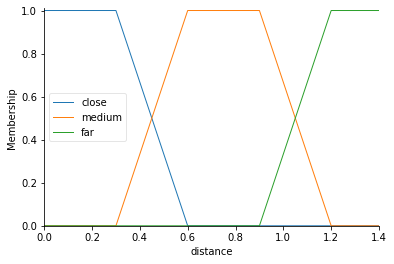

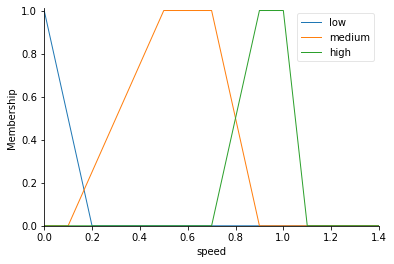

In [132]:
# # Trapezoidal membership function

# distance = ctrl.Antecedent(np.arange(0, 1.5, 0.1), 'distance')
# speed = ctrl.Consequent(np.arange(0, 1.5, 0.1), 'speed')

# distance['close'] = fuzz.trapmf(distance.universe, [0, 0, 0.3, 0.6])
# distance['medium'] = fuzz.trapmf(distance.universe, [0.3, 0.6, 0.9, 1.2])
# distance['far'] = fuzz.trapmf(distance.universe, [0.9, 1.2, 1.5, 2.0])

# distance.view()

# speed['low'] = fuzz.trapmf(speed.universe, [-2, -1, 0, 0.2])
# speed['medium'] = fuzz.trapmf(speed.universe, [0.1, 0.5, 0.7, 0.9])
# speed['high'] = fuzz.trapmf(speed.universe, [0.7, 0.9, 1, 1])

# speed.view()

# rule1 = ctrl.Rule(distance['close'], speed['low'])
# rule2 = ctrl.Rule(distance['medium'], speed['medium'])
# rule3 = ctrl.Rule(distance['far'], speed['high'])

# control_system = ctrl.ControlSystem([rule1, rule2, rule3])
# control = ctrl.ControlSystemSimulation(control_system)

# control.input['distance'] = 0.1  # random value
# control.compute()
# print(control.output['speed'])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.0777997460134465


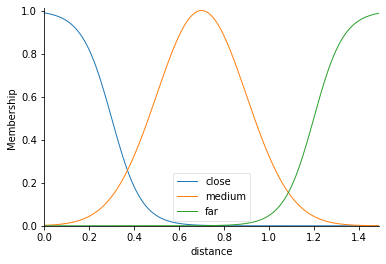

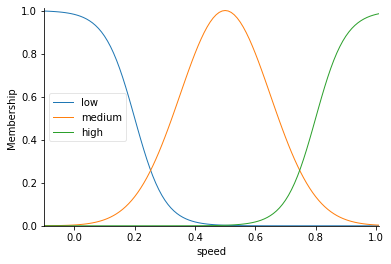

In [211]:
# Sinusoidal membership function

distance = ctrl.Antecedent(np.arange(0, 1.5, 0.01), 'distance')
speed = ctrl.Consequent(np.arange(-0.1, 1.01, 0.01), 'speed')

distance['close'] = fuzz.sigmf(distance.universe, 0.3, -15)
distance['medium'] = fuzz.gaussmf(distance.universe, 0.7, 0.2)
distance['far'] = fuzz.sigmf(distance.universe, 1.2, 15)

distance.view()

speed['low'] = fuzz.sigmf(speed.universe, 0.2, -20)
speed['medium'] = fuzz.gaussmf(speed.universe, 0.5, 0.15)
speed['high'] = fuzz.sigmf(speed.universe, 0.8, 20)

speed.view()

rule1 = ctrl.Rule(distance['close'], speed['low'])
rule2 = ctrl.Rule(distance['medium'], speed['medium'])
rule3 = ctrl.Rule(distance['far'], speed['high'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3])
control = ctrl.ControlSystemSimulation(control_system)

control.input['distance'] = 0.1  # random value
control.compute()
print(control.output['speed'])

In [205]:
def set_speed(velocity):
    vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, velocity, vrep.simx_opmode_streaming)
    vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, velocity, vrep.simx_opmode_streaming)

In [206]:
vrep.simxFinish(-1)  # closes all opened connections, in case any previous wasn't finished
clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # start a connection

if clientID != -1:
    print("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

# get handles to robot drivers
lf_err_code, lf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LF", vrep.simx_opmode_blocking)
lb_err_code, lb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_LB", vrep.simx_opmode_blocking)
rb_err_code, rb_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RB", vrep.simx_opmode_blocking)
rf_err_code, rf_motor_handle = vrep.simxGetObjectHandle(clientID, "WheelJoint_RF", vrep.simx_opmode_blocking)

# Turn on the drives
# err_code = vrep.simxSetJointTargetVelocity(clientID, lb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rb_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, lf_motor_handle, 1.0, vrep.simx_opmode_streaming)
# err_code = vrep.simxSetJointTargetVelocity(clientID, rf_motor_handle, 1.0, vrep.simx_opmode_streaming)

Connected to remote API server


In [207]:
# get handle to the load
load_err_code, load_handle = vrep.simxGetObjectHandle(clientID, "Load", vrep.simx_opmode_blocking)

# get first position of load
err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_streaming)

# get positions of load
t = time.time()
while True:  # read values for 15 seconds
    err_code, position = vrep.simxGetObjectPosition(clientID, load_handle, -1, vrep.simx_opmode_buffer)
    if err_code == 0:
        distance = position[0] - DESTINATION_POINT
        control.input['distance'] = distance
        control.compute()
        speed = control.output['speed']
        set_speed(speed)
        print('Position =', position[0], '\t\tSpeed =', speed)

Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3997719287872314 		Speed = 0.848015708931392
Position = 1.3

Position = 1.3993868827819824 		Speed = 0.8478804317008611
Position = 1.3993868827819824 		Speed = 0.8478804317008611
Position = 1.3993868827819824 		Speed = 0.8478804317008611
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.84782855773444

Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.84782855773444

Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.8478285577344482
Position = 1.3992393016815186 		Speed = 0.84782855773444

Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.8477637169838903
Position = 1.3990548849105835 		Speed = 0.84776371698389

Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.8478071840258656
Position = 1.3991785049438477 		Speed = 0.84780718402586

Position = 1.399609923362732 		Speed = 0.8479588033143832
Position = 1.399609923362732 		Speed = 0.8479588033143832
Position = 1.399609923362732 		Speed = 0.8479588033143832
Position = 1.399609923362732 		Speed = 0.8479588033143832
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
Position = 1.3998818397521973 		Speed = 0.8480543066122725
P

Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.8479123956753212
Position = 1.3994778394699097 		Speed = 0.84791239567532

Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.8449326261777451
Position = 1.3910621404647827 		Speed = 0.84493262617774

Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.8335878419403613
Position = 1.3659027814865112 		Speed = 0.83358784194036

Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.8166526096757437
Position = 1.3391649723052979 		Speed = 0.81665260967574

Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.307525396347046 		Speed = 0.7876052001360834
Position = 1.3

Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.261669635772705 		Speed = 0.7227776010310892
Position = 1.2

Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.6782056906230648
Position = 1.2380590438842773 		Speed = 0.67820569062306

Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.6498275684800952
Position = 1.2243430614471436 		Speed = 0.64982756848009

Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.6436009658840368
Position = 1.2214051485061646 		Speed = 0.64360096588403

Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.6544174621224764
Position = 1.2265253067016602 		Speed = 0.65441746212247

Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.6732748676566274
Position = 1.2356289625167847 		Speed = 0.67327486765662

Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.240535855293274 		Speed = 0.6831808712092358
Position = 1.2

Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.2492170333862305 		Speed = 0.7001061529496109
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Position = 1.252454400062561 		Speed = 0.7061757229034575
Posit

Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.7103615742142347
Position = 1.2547276020050049 		Speed = 0.71036157421423

Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.7129122906978057
Position = 1.2561254501342773 		Speed = 0.71291229069780

Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2551988363265991 		Speed = 0.7112233870713656
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.7086135290372655
Position = 1.2537751197814941 		Speed = 0.70861352903726

Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.7000453309839607
Position = 1.2491852045059204 		Speed = 0.70004533098396

Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2458171844482422 		Speed = 0.6935614959229631
Position = 1.2414886951446533 		Speed = 0.6850723970983477
Position = 1.2414886951446533 		Speed = 0.6850723970983477
Position = 1.2414886951446533 		Speed = 0.6850723970983477
Position = 1.2414886951446533 		Speed = 0.68507239709834

Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.6601624792121722
Position = 1.2292749881744385 		Speed = 0.66016247921217

Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.6238642132151412
Position = 1.2121169567108154 		Speed = 0.62386421321514

Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.5763439700643513
Position = 1.1891181468963623 		Speed = 0.57634397006435

Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.160417079925537 		Speed = 0.5400162693383153
Position = 1.1

Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.5131320067099521
Position = 1.1159980297088623 		Speed = 0.51313200670995

Position = 1.1032317876815796 		Speed = 0.509300539259787
Position = 1.1032317876815796 		Speed = 0.509300539259787
Position = 1.1032317876815796 		Speed = 0.509300539259787
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0923762321472168 		Speed = 0.506882670847431
Position = 1.0

Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.5045898382821143
Position = 1.0782406330108643 		Speed = 0.50458983828211

Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.5042552006092051
Position = 1.0755894184112549 		Speed = 0.50425520060920

Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0833932161331177 		Speed = 0.505330610629352
Position = 1.0

Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.5081631449851621
Position = 1.0985616445541382 		Speed = 0.50816314498516

Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.117140293121338 		Speed = 0.5135314575024484
Position = 1.126278042793274 		Speed = 0.5172009576317897
Position = 1.1

Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.5213142566090051
Position = 1.1346464157104492 		Speed = 0.52131425660900

Position = 1.1418260335922241 		Speed = 0.5255296224265477
Position = 1.1418260335922241 		Speed = 0.5255296224265477
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.5293585483794775
Position = 1.1474682092666626 		Speed = 0.52935854837947

Position = 1.1513012647628784 		Speed = 0.5322185420309773
Position = 1.1513012647628784 		Speed = 0.5322185420309773
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1.153138518333435 		Speed = 0.5336997280991671
Position = 1

Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1529486179351807 		Speed = 0.5335453292428368
Position = 1.1508550643920898 		Speed = 0.5318630002857083
Position = 1.1508550643920898 		Speed = 0.5318630002857083
Position = 1.1508550643920898 		Speed = 0.5318630002857083
Position = 1.1508550643920898 		Speed = 0.53186300028570

Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1470917463302612 		Speed = 0.5290911673254769
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.5255899015835673
Position = 1.1419191360473633 		Speed = 0.52558990158356

Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.5180380852200828
Position = 1.1281406879425049 		Speed = 0.51803808522008

Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.119722843170166 		Speed = 0.5144537946849044
Position = 1.1103681325912476 		Speed = 0.5112558053026045
Position = 1.1103681325912476 		Speed = 0.5112558053026045
Position = 1.1103681325912476 		Speed = 0.5112558053026045
Position = 

Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.5062415570065949
Position = 1.0890237092971802 		Speed = 0.50624155700659

Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.5030880071883607
Position = 1.0648150444030762 		Speed = 0.50308800718836

Position = 1.0520702600479126 		Speed = 0.5020846908652342
Position = 1.0520702600479126 		Speed = 0.5020846908652342
Position = 1.0520702600479126 		Speed = 0.5020846908652342
Position = 1.0520702600479126 		Speed = 0.5020846908652342
Position = 1.0520702600479126 		Speed = 0.5020846908652342
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position = 1.039225459098816 		Speed = 0.5013771408464472
Position 

Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.026578664779663 		Speed = 0.5008987525654116
Position = 1.0

Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.5003733737669536
Position = 1.0031230449676514 		Speed = 0.50037337376695

Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.5002428792923125
Position = 0.9929278492927551 		Speed = 0.50024287929231

Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9841516613960266 		Speed = 0.5001600519219013
Position = 0.9770956635475159 		Speed = 0.5001113322410228
Position = 0.9770956635475159 		Speed = 0.50011133224102

Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.5000819486635115
Position = 0.9720320105552673 		Speed = 0.50008194866351

Position = 0.9688166379928589 		Speed = 0.5000684991610505
Position = 0.9688166379928589 		Speed = 0.5000684991610505
Position = 0.9688166379928589 		Speed = 0.5000684991610505
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.5000769543456373
Position = 0.9709018468856812 		Speed = 0.50007695434563

Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.5001427743072167
Position = 0.9818130135536194 		Speed = 0.50014277430721

Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.5003166172028393
Position = 0.9993385076522827 		Speed = 0.50031661720283

Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0094114542007446 		Speed = 0.5004788649605947
Position = 1.0196067094802856 		Speed = 0.50070222987725
Position = 1.0196067094802856 		Speed = 0.50070222987725
Position = 1.0196067094802856 		Speed = 0.50070222987725
Position = 1.0196067094802856 		Speed = 0.50070222987725
Position = 1.0196067094802856 		Speed = 0.50070222987725
Positio

Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.5009876227349571
Position = 1.0293105840682983 		Speed = 0.50098762273495

Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.050083875656128 		Speed = 0.5019566743612165
Position = 1.0

Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.5021310667436626
Position = 1.0527528524398804 		Speed = 0.50213106674366

Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.50213592430188

Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.5021359243018818
Position = 1.0528209209442139 		Speed = 0.50213592430188

Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.5019693586186439
Position = 1.0502822399139404 		Speed = 0.50196935861864

Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.5016897767349121
Position = 1.0452829599380493 		Speed = 0.50168977673491

Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.5009710317992797
Position = 1.0288141965866089 		Speed = 0.50097103179927

Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.006211519241333 		Speed = 0.5004246315918246
Position = 1.0

Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		Speed = 0.5002520456923896
Position = 0.99373859167099 		S

Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		Speed = 0.500136883516973
Position = 0.981008768081665 		

Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.5000267021528018
Position = 0.9558696150779724 		Speed = 0.50002670215280

Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.943822979927063 		Speed = 0.5000065520872383
Position = 0.9

Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 

Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 0.49999999999999944
Position = 0.9214441776275635 		Speed = 

Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 

Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 0.49999999999999967
Position = 0.9113591909408569 		Speed = 

Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.4999999999999996
Position = 0.9021649956703186 		Speed = 0.49999999999999

Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 

Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 

Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 0.49999999999999983
Position = 0.8939812779426575 		Speed = 

Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 

Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 0.49999999999999983
Position = 0.8869080543518066 		Speed = 

Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.49999999999999

Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.4999999999999996
Position = 0.8810648322105408 		Speed = 0.49999999999999

Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 

Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 0.49999999999999983
Position = 0.8766540288925171 		Speed = 

Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.49999999999999

Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.8739156723022461 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
P

Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.873023509979248 		Speed = 0.4999999999999996
Position = 0.8

Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 

Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 0.49999999999999956
Position = 0.8740276098251343 		Speed = 

Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 

Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 

Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 0.49999999999999983
Position = 0.8769236207008362 		Speed = 

Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.49999999999999

Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.49999999999999

Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.4999999999999998
Position = 0.8816445469856262 		Speed = 0.49999999999999

Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 

Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8880282640457153 		Speed = 0.49999999999999983
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 

Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 

Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.8957029581069946 		Speed = 0.49999999999999994
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 

Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 

Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 0.49999999999999967
Position = 0.9042422771453857 		Speed = 

Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.913206934928894 		Speed = 0.49999999999999944
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.49999999999999

Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.4999999999999998
Position = 0.9220489859580994 		Speed = 0.49999999999999

Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.9

Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.930109441280365 		Speed = 0.5000000940574936
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0

Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.50000307104039

Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.5000030710403922
Position = 0.9367913007736206 		Speed = 0.50000307104039

Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.50000540117674

Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.5000054011767482
Position = 0.9416605234146118 		Speed = 0.50000540117674

Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9444981217384338 		Speed = 0.500006979442677
Position = 0.9

Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.50000797107692

Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.5000079710769298
Position = 0.9451295733451843 		Speed = 0.50000797107692

Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.9

Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.943476140499115 		Speed = 0.5000063668855123
Position = 0.9

Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.50000430044221

Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.5000043004422139
Position = 0.9395096302032471 		Speed = 0.50000430044221

Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.50000153241597

Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.5000015324159722
Position = 0.9333552122116089 		Speed = 0.50000153241597

Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.49999999999999

Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.49999999999999

Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9252433180809021 		Speed = 0.4999999999999998
Position = 0.9154366850852966 		Speed = 0.49999999999999

Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.49999999999999

Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.4999999999999996
Position = 0.9154366850852966 		Speed = 0.49999999999999

Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.49999999999999

Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.4999999999999998
Position = 0.9042158722877502 		Speed = 0.49999999999999

Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.49999999999999

Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.4999999999999998
Position = 0.8919460773468018 		Speed = 0.49999999999999

Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 

Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 0.49999999999999956
Position = 0.8791652321815491 		Speed = 

Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 0.49999999999999983
Position = 0.8664582371711731 		Speed = 

Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.49999999999999

Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.4999999999999996
Position = 0.8540709018707275 		Speed = 0.49999999999999

Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.49999999999999

Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.49999999999999

Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.49999999999999

Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8419740796089172 		Speed = 0.4999999999999996
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49

Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 

Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 0.49999999999999956
Position = 0.8303236961364746 		Speed = 

Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.4999999999999997
Position = 0.8194964528083801 		Speed = 0.49999999999999

Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.49999999999999

Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.49999999999999

Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.49999999999999

Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8095852136611938 		Speed = 0.4999999999999997
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.49999999999999

Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.49999999999999

Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.4999999999999998
Position = 0.8007322549819946 		Speed = 0.49999999999999

Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.49999999999999

Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.4999999999999997
Position = 0.7931810617446899 		Speed = 0.49999999999999

Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.49999999999999

Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.4999999999999998
Position = 0.7868574857711792 		Speed = 0.49999999999999

Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.49999999999999

Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.4999999999999997
Position = 0.7815871238708496 		Speed = 0.49999999999999

Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.49999999999999

Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.4999999999999996
Position = 0.7775263786315918 		Speed = 0.49999999999999

Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.49999999999999

Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7749231457710266 		Speed = 0.4999999999999996
Position = 0.7738766074180603 		Speed = 0.49999999999999983
Position = 0.7738766074180603 		Speed = 0.49999999999999983
Position = 0.7738766074180603 		Speed = 0.49999999999999983
Position = 0.7738766074180603 		Speed = 0.49999999999999983
Position = 0.7738766074180603 		Speed = 0.4999999999

Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7742784023284912 		Speed = 0.4999999999999996
Position = 0.7760276794433594 		Speed = 0.4999999999999997
Position = 0.7760276794433594 		Speed = 0.4999999999999997
Position = 0.7760276794433594 		Speed = 0.4999999999999997
Position = 0.7760276794433594 		Speed = 0.4999999999999997
Position = 0.7760276794433594 		Speed = 0.49999999999999

Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.783486545085907 		Speed = 0.4999999999999996
Position = 0.7

Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.7961581945419312 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.4999999999999996
Position = 0.8041912317276001 		Speed = 0.49999999999999

Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.4999999999999996
Position = 0.8210368752479553 		Speed = 0.49999999999999

Position = 0.8283661007881165 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.4999999999999997
Position = 0.8343086242675781 		Speed = 0.49999999999999

Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.4999999999999997
Position = 0.8386716246604919 		Speed = 0.49999999999999

Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8419281840324402 		Speed = 0.4999999999999998
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.4999999999999996
Position = 0.8402130007743835 		Speed = 0.49999999999999

Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8358742594718933 		Speed = 0.4999999999999998
Position = 0.8289161920547485 		Speed = 0.4999999999999995
Position = 0.8289161920547485 		Speed = 0.4999999999999995
Position = 0.8289161920547485 		Speed = 0.4999999999999995
Position = 0.8289161920547485 		Speed = 0.49999999999999

Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.4999999999999997
Position = 0.8084819912910461 		Speed = 0.49999999999999

Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7958882451057434 		Speed = 0.4999999999999997
Position = 0.7822602391242981 		Speed = 0.4999999999999996
Position = 0.7822602391242981 		Speed = 0.4999999999999996
Position = 0.7822602391242981 		Speed = 0.4999999999999996
Position = 0.7822602391242981 		Speed = 0.4999999999999996
Position = 0.7822602391242981 		Speed = 0.4999999999999996
Position = 0.7822602391242981 		Speed = 0.49999999999999

Position = 0.767994225025177 		Speed = 0.49999912903128424
Position = 0.767994225025177 		Speed = 0.49999912903128424
Position = 0.767994225025177 		Speed = 0.49999912903128424
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 0.7536272406578064 		Speed = 0.499990924029566
Position = 

Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7397076487541199 		Speed = 0.49996706758572207
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 0.49992374616890595
Position = 0.7267887592315674 		Speed = 

Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7153030633926392 		Speed = 0.4998599837142251
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978115106210885
Position = 0.7054113149642944 		Speed = 0.49978

Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.4996126190056752
Position = 0.6906381845474243 		Speed = 0.49961261900567

Position = 0.6819038391113281 		Speed = 0.4994706946469748
Position = 0.6819038391113281 		Speed = 0.4994706946469748
Position = 0.6819038391113281 		Speed = 0.4994706946469748
Position = 0.6819038391113281 		Speed = 0.4994706946469748
Position = 0.6819038391113281 		Speed = 0.4994706946469748
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.4994240535231566
Position = 0.6793969869613647 		Speed = 0.49942405352315

Position = 0.6782197952270508 		Speed = 0.49939957824308884
Position = 0.6782197952270508 		Speed = 0.49939957824308884
Position = 0.6782197952270508 		Speed = 0.49939957824308884
Position = 0.6782197952270508 		Speed = 0.49939957824308884
Position = 0.6782197952270508 		Speed = 0.49939957824308884
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.4994025431839722
Position = 0.6783621907234192 		Speed = 0.499402543

Position = 0.6819555759429932 		Speed = 0.4994716198564185
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.4995263250016274
Position = 0.6850271224975586 		Speed = 0.49952632500162

Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.4995826001236724
Position = 0.6885614991188049 		Speed = 0.49958260012367

Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6966437101364136 		Speed = 0.499690316521884
Position = 0.6

Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7123705148696899 		Speed = 0.49984102624457466
Position = 0.7180466055870056 		Speed = 

Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 0.49990612093648423
Position = 0.7233901023864746 		Speed = 

Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.4999506385331936
Position = 0.7345720529556274 		Speed = 0.49995063853319

Position = 0.7334827780723572 		Speed = 0.4999471443765221
Position = 0.7334827780723572 		Speed = 0.4999471443765221
Position = 0.7334827780723572 		Speed = 0.4999471443765221
Position = 0.7334827780723572 		Speed = 0.4999471443765221
Position = 0.7334827780723572 		Speed = 0.4999471443765221
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.4999340012436131
Position = 0.7294783592224121 		Speed = 0.49993400124361

Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 0.49990513095990396
Position = 0.7231996059417725 		Speed = 

Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 0.49964243822969007
Position = 0.6929335594177246 		Speed = 

Position = 0.6650696396827698 		Speed = 0.49907923726452574
Position = 0.6650696396827698 		Speed = 0.49907923726452574
Position = 0.6650696396827698 		Speed = 0.49907923726452574
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.4985618697608496
Position = 0.6500852108001709 		Speed = 0.49856186976

Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.4967703486307296
Position = 0.6210411190986633 		Speed = 0.49677034863072

Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 0.49236778332868103
Position = 0.5873711705207825 		Speed = 

Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.48969445317437393
Position = 0.575020968914032 		Speed = 0.489694453174373

Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5721562504768372 		Speed = 0.488972564308659
Position = 0.5739222764968872 		Speed = 0.4894192541178472
Position = 0.5739222764968872 		Speed = 0.4894192541178472
Position = 0.5739222764968872 		Speed = 0.4894192541178472
Position = 0.5739222764968872 		Speed = 0.4894192541178472
Position =

Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.49232532793830736
Position = 0.587155282497406 		Speed = 0.492325327938307

Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5986512303352356 		Speed = 0.494239834736443
Position = 0.5

Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 0.49615435570981703
Position = 0.6144865155220032 		Speed = 

Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.4968779957473462
Position = 0.6223340630531311 		Speed = 0.49687799574734

Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6269579529762268 		Speed = 0.4972356508903987
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.4972946335539554
Position = 0.6277415156364441 		Speed = 0.49729463355395

Position = 0.6259285807609558 		Speed = 0.49715781596671615
Position = 0.6259285807609558 		Speed = 0.49715781596671615
Position = 0.6259285807609558 		Speed = 0.49715781596671615
Position = 0.6259285807609558 		Speed = 0.49715781596671615
Position = 0.6259285807609558 		Speed = 0.49715781596671615
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.4969668093225764
Position = 0.6234248280525208 		Speed = 0.496966809

Position = 0.6199154853820801 		Speed = 0.49667515875628426
Position = 0.6199154853820801 		Speed = 0.49667515875628426
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.49624089021434703
Position = 0.615344762802124 		Speed = 0.4962408902143

Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.6026444435119629 		Speed = 0.49478229871340645
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.4935750580160496
Position = 0.5944166779518127 		Speed = 0.493575

Position = 0.5741585493087769 		Speed = 0.48947860818181
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5623050928115845 		Speed = 0.4861010926173076

Position = 0.5623050928115845 		Speed = 0.4861010926173076
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0.48141459595514197
Position = 0.5495598316192627 		Speed = 0

Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.4667751985730398
Position = 0.5229112505912781 		Speed = 0.46677519857303

Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed = 0.4342645716468344
Position = 0.48792779445648193 		Speed =

Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.47315680980682373 		Speed = 0.4153169153037715
Position = 0.4689065217971802 		Speed = 0.4092293056320187
Position = 0.4689065217971802 		Speed = 0.4092293056320187
Position = 0.4689065217971802 		Speed = 0.4092293056320187
Position = 0.4689065217971802 		Speed = 0.4092293056320187
Position = 0.4689065217971802 		Speed = 0.40

Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed = 0.4060839851494141
Position = 0.46684134006500244 		Speed =

Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.4102318686252659
Position = 0.4695665240287781 		Speed = 0.41023186862526

Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 0.42508691914187446
Position = 0.4804497957229614 		Speed = 

Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.497126042842865 		Speed = 0.4444761862850482
Position = 0.4

Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.4614852662329391
Position = 0.5157803893089294 		Speed = 0.46148526623293

Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5243216156959534 		Speed = 0.4677342943281308
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.4724349026823482
Position = 0.5317083597183228 		Speed = 0.47243490268234

Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 0.47574160272711247
Position = 0.5376296043395996 		Speed = 

Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5449913144111633 		Speed = 0.479382909687551
Position = 0.5

Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.5405111908912659 		Speed = 0.4772576920537417
Position = 0.535637378692627 		Speed = 0.4746590050145169
Position = 0.535637378692627 		Speed = 0.4746590050145169

Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.4655960227895828
Position = 0.5212150812149048 		Speed = 0.46559602278958

Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 0.45833595665702165
Position = 0.5118557214736938 		Speed = 

Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227630615 		Speed = 0.42171240402386095
Position = 0.47789037227

Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed = 0.3843530578736883
Position = 0.45299094915390015 		Speed =

Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed = 0.3643841843222117
Position = 0.44079187512397766 		Speed =

Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.41806548833847046 		Speed = 0.3269010321518498
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed = 0.3107631704412829
Position = 0.40797579288482666 		Speed =

Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.2968884533278983
Position = 0.3990040421485901 		Speed = 0.29688845332789

Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 0.27688219883910503
Position = 0.3852735757827759 		Speed = 

Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 0.26757525233028234
Position = 0.3785514533519745 		Speed = 

Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.2749333446836365
Position = 0.3838844299316406 		Speed = 0.27493334468363

Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.3900417983531952 		Speed = 0.2835877737317585
Position = 0.39801037311553955 		Speed = 0.2954098654635362
Position = 0.39801037311553955 		Speed = 0.2954098654635362
Position = 0.39801037311553955 		Speed = 0.2954098654635362
Position = 0.39801037311553955 		Speed = 0.2954098654

Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 0.30968475220819197
Position = 0.4072832465171814 		Speed = 

Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.343495031289645
Position = 0.42818498611450195 		Speed = 0.3434950312896

Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed = 0.3789833856840421
Position = 0.44966933131217957 		Speed =

Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed = 0.4082632206526183
Position = 0.46827131509780884 		Speed =

Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.4249343500785088
Position = 0.4803292155265808 		Speed = 0.42493435007850

Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed = 0.4289763618287039
Position = 0.48355138301849365 		Speed =

Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.4199024732909957
Position = 0.4765392541885376 		Speed = 0.41990247329099

Position = 0.45922064781188965 		Speed = 0.394326216692972
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.44741517305374146 		Speed = 0.37529312109821406
Position = 0.4474151730537

Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed = 0.3533518263234036
Position = 0.43413305282592773 		Speed =

Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.2818668002204321
Position = 0.3888213634490967 		Speed = 0.28186680022043

Position = 0.3575096130371094 		Speed = 0.24124630015714346
Position = 0.3575096130371094 		Speed = 0.24124630015714346
Position = 0.3575096130371094 		Speed = 0.24124630015714346
Position = 0.3575096130371094 		Speed = 0.24124630015714346
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 0.22549590738681252
Position = 0.3430768847465515 		Speed = 

Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216644287 		Speed = 0.20297894238374514
Position = 0.31875932216

Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.19556180286428043
Position = 0.309373140335083 		Speed = 0.195561802864280

Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2971706986427307 		Speed = 0.18695466963922117
Position = 0.2950364351272583 		Speed = 

Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 0.18555915195515393
Position = 0.2950364351272583 		Speed = 

Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.29907089471817017 		Speed = 0.1881950785548031
Position = 0.30474430322647095 		Speed = 0.1922205000155781
Position = 0.30474430322647095 		Speed = 0.1922205000155781
Position = 0.30474430322647095 		Speed =

Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.31252938508987427 		Speed = 0.198028422266513
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.2058084171611996
Position = 0.32210201025009155 		Speed = 0.205808

Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055648804 		Speed = 0.21571071214718338
Position = 0.33313173055

Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328948975 		Speed = 0.24251625737060736
Position = 0.35862672328

Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729148865 		Speed = 0.27798654268895645
Position = 0.38606032729

Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 0.31562333264538883
Position = 0.4110601544380188 		Speed = 

Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.42141759395599365 		Speed = 0.332354310728273
Position = 0.4296914339065552 		Speed = 0.34597667399578697
Position = 0.4296914339065552 		Speed = 0.34597667399578697
Position = 0.4296914339065552 		Speed = 0.34597667399578697
Position = 0.4296914339065552 		Speed = 0.34597667399578697
Position = 0.4296914339065552 		Speed = 0.34597667399578697
Position = 0.4296914339065552 		Speed = 0.345976673

Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed = 0.3556982815389082
Position = 0.43554824590682983 		Speed =

Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.3620082976720467
Position = 0.4393571615219116 		Speed = 0.36200829767204

Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382598877 		Speed = 0.35802730110782693
Position = 0.43695366382

Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed = 0.2992227438972579
Position = 0.40054890513420105 		Speed =

Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3696398138999939 		Speed = 0.25588835875790267
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 0.23503618328298692
Position = 0.3520359992980957 		Speed = 

Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231292725 		Speed = 0.19982368603291586
Position = 0.31478822231

Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.29642054438591003 		Speed = 0.1864644566062773
Position = 0.27920272946357727 		Speed = 0.17598379052101562
Position = 0.27920272946357727 		Speed = 0.17598379052101562
Position = 0.27920272946357727 		Speed

Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.1681242048022258
Position = 0.2636376619338989 		Speed = 0.16812420480222

Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed = 0.1622452566271045
Position = 0.25012534856796265 		Speed =

Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884750366 		Speed = 0.15548285376074916
Position = 0.23102372884

Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561969757 		Speed = 0.15402234456952363
Position = 0.22615082561

Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974071503 		Speed = 0.15410420490035312
Position = 0.22643212974

Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525287628 		Speed = 0.15557797372951174
Position = 0.23130996525

Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682937622 		Speed = 0.15812395508121832
Position = 0.23900538682

Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.24929179251194 		Speed = 0.16192903607170214
Position = 0.2

Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.17484088660089

Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.1748408866008912
Position = 0.2770337760448456 		Speed = 0.17484088660089

Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.1847212595886884
Position = 0.2937502861022949 		Speed = 0.18472125958868

Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.31143808364

Position = 0.31143808364868164 		Speed = 0.19716000640417788
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401519775 		Speed = 0.21208270508522944
Position = 0.32928526401

Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed = 0.2291022253325107
Position = 0.34652626514434814 		Speed =

Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.2471479769995404
Position = 0.3625120222568512 		Speed = 0.24714797699954

Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 0.26513321213691565
Position = 0.3766973912715912 		Speed = 

Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.281533278065912
Position = 0.38858428597450256 		Speed = 0.2815332780659

Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40377920866012573 		Speed = 0.30423553599911646
Position = 0.40658578276

Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822784424 		Speed = 0.30207538094721115
Position = 0.40238773822

Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed = 0.2775084626011345
Position = 0.38571977615356445 		Speed =

Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed = 0.2227458645455649
Position = 0.34044161438941956 		Speed =

Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963546753 		Speed = 0.18978404189487022
Position = 0.30136173963

Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740600586 		Speed = 0.16675729968787917
Position = 0.26075124740

Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185214996 		Speed = 0.15320021964542951
Position = 0.22333063185

Position = 0.19371286034584045 		Speed = 0.14619772601065156
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866077423 		Speed = 0.14424750668047784
Position = 0.18301577866

Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed = 0.1423631824775362
Position = 0.17119593918323517 		Speed =

Position = 0.17050199210643768 		Speed = 0.14225510493117247
Position = 0.17050199210643768 		Speed = 0.14225510493117247
Position = 0.17050199210643768 		Speed = 0.14225510493117247
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359802246 		Speed = 0.14271356031580207
Position = 0.17345595359

Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.145479147212082
Position = 0.19009248912334442 		Speed = 0.1454791472120

Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927425385 		Speed = 0.15215296084838992
Position = 0.21971724927

Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869369507 		Speed = 0.16468014772860518
Position = 0.25589650869

Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed = 0.1862126579173554
Position = 0.29603540897369385 		Speed =

Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379089355 		Speed = 0.23096206195730842
Position = 0.34830546379

Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187057495 		Speed = 0.25569208539914945
Position = 0.36948031187

Position = 0.3766249716281891 		Speed = 0.2650378880439101
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.2620026723383158
Position = 0.3743174076080322 		Speed = 0.26200267233831

Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937667847 		Speed = 0.24134460951041126
Position = 0.35759609937

Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168800354 		Speed = 0.21124389138210606
Position = 0.32832375168

Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.1822893548753924
Position = 0.2900148630142212 		Speed = 0.18228935487539

Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed = 0.1611143588418456
Position = 0.24710677564144135 		Speed =

Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097896576 		Speed = 0.15396242671552374
Position = 0.22594498097

Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 

Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 0.14496129537999203
Position = 0.1871129870414734 		Speed = 

Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904582977 		Speed = 0.14224177701509894
Position = 0.17041651904

Position = 0.1447017341852188 		Speed = 0.13909472978391862
Position = 0.1447017341852188 		Speed = 0.13909472978391862
Position = 0.1447017341852188 		Speed = 0.13909472978391862
Position = 0.1447017341852188 		Speed = 0.13909472978391862
Position = 0.1447017341852188 		Speed = 0.13909472978391862
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.13653169572353363 		Speed = 0.13829715085661837
Position = 0.1365316957235336

Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13184283673763275 		Speed = 0.13787554061658452
Position = 0.13045434653759003 		Speed = 0.13775161265859567
Position = 0.13045434653759003 		Speed = 0.13775161265859567
Position = 0.13045434653759003 		Speed = 0.13775161265859567
Position = 0.13045434653759003 		Speed = 0.13775161265859567
Position = 0.13045434653

Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.13221566379070282 		Speed = 0.13790880877862272
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		Speed = 0.13835846380309705
Position = 0.1372145414352417 		

Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.14547553658485413 		Speed = 0.1391748983354916
Position = 0.15674042701721191 		Speed = 0.14044142203980117
Position = 0.15674042701721191 		Speed = 0.14044142203980117
Position = 0.15674042701721191 		Speed = 0.14044142203980117
Position = 0.15674042701721191 		Speed = 0.14044142203980117
Position = 0.15674042701721191 		Spe

Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941

Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941993713 		Speed = 0.14228113484880023
Position = 0.17066898941

Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.14493847115483388
Position = 0.186981201171875 		Speed = 0.144938471154833

Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed =

Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed = 0.1486192947349819
Position = 0.20531725883483887 		Speed =

Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 

Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 0.15370251603735316
Position = 0.2250526249408722 		Speed = 

Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 0.16919347127957798
Position = 0.2658988833427429 		Speed = 

Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 

Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 0.17952380500939383
Position = 0.2853114604949951 		Speed = 

Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 0.20243505948467555
Position = 0.3180776536464691 		Speed = 

Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.3302275240421295 		Speed = 0.21292627271102849
Position = 0.33899879455566406 		Speed = 0.22132799931947825
Position = 0.33899879455566406 		Speed 

Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197

Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197494507 		Speed = 0.22757879344169818
Position = 0.34506887197

Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 0.21740556705996106
Position = 0.3349013030529022 		Speed = 

Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344

Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344047546 		Speed = 0.20738614136405656
Position = 0.32390615344

Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 0.19553291489765492
Position = 0.3093331456184387 		Speed = 

Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100265503 		Speed = 0.18334991432437162
Position = 0.29164189100

Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.2714703679084778 		Speed = 0.17189995568144265
Position = 0.24957510828971863 		Speed = 0.16203453362771716
Position = 0.24957510828971863 		Speed = 0.16203453362771716
Position = 0.24957510828971863 		Speed = 0.16203453362771716
Position = 0.24957510828971863 		Speed = 0.16203453362771716
Position = 0.24957510828971863 		Speed = 0.16203453362771716
Position = 0.24957510828971863 		Sp

Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed = 0.1482629250671402
Position = 0.20372304320335388 		Speed =

Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.1408100676253146
Position = 0.1598745733499527 		Speed = 0.14081006762531

Position = 0.12383835017681122 		Speed = 0.13723902145893616
Position = 0.12383835017681122 		Speed = 0.13723902145893616
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524997711 		Speed = 0.13630871276733433
Position = 0.11002625524

Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530715942 		Speed = 0.13576853292885535
Position = 0.09218579530

Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085487366 		Speed = 0.13576853292885535
Position = 0.08870235085

Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310569763 		Speed = 0.13581685870440924
Position = 0.10090169310

Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764987946 		Speed = 0.13739093529564006
Position = 0.12582577764

Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078861237 		Speed = 0.14110707421585084
Position = 0.16207458078

Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070404053 		Speed = 0.15374575355335487
Position = 0.22520101070

Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed = 0.1680804946672766
Position = 0.26354536414146423 		Speed =

Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930114746 		Speed = 0.18478461329126278
Position = 0.29384779930

Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012908936 		Speed = 0.19704640199287027
Position = 0.31129539012

Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 0.19365746362357456
Position = 0.3067387044429779 		Speed = 

Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721572876 		Speed = 0.17926912519812813
Position = 0.28487926721

Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.25026702880859375 		Speed = 0.16230465965712576
Position = 0.22887994349002838 		Speed = 0.1548157244080642
Position = 0.22887994349002838 		Speed = 0.1548157244080642
Position = 0.2288799434900

Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.18224745988845825 		Speed = 0.14411265787087618
Position = 0.15924584865570068 		Speed = 0.140736370654634
Position = 0.15924584865570068 		Speed = 0.140736370654634
Position = 0.15924584865570068 		Speed = 0.140736370654634
Position = 0.15924584865570068 		Speed = 0.140736370654634
Position = 0.15924584865570068 	

Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.13749805092811584 		Speed = 0.13838389036390877
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207569122 		Speed = 0.13677383771119603
Position = 0.11729498207

Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252731323 		Speed = 0.13576853292885535
Position = 0.08253592252

Position = 0.06920888274908066 		Speed = 0.13576853292885535
Position = 0.06920888274908066 		Speed = 0.13576853292885535
Position = 0.06920888274908066 		Speed = 0.13576853292885535
Position = 0.06920888274908066 		Speed = 0.13576853292885535
Position = 0.06920888274908066 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041332245 		Speed = 0.13576853292885535
Position = 0.05956535041

Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position = 0.053940579295158386 		Speed = 0.13576853292885535
Position

Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832508087 		Speed = 0.13576853292885535
Position = 0.06028027832

Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700958252 		Speed = 0.13576853292885535
Position = 0.09908592700

Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968235016 		Speed = 0.13843867575156307
Position = 0.13810957968

Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 0.14075207513836557
Position = 0.1593797355890274 		Speed = 

Position = 0.180790975689888 		Speed = 0.14385615744047003
Position = 0.180790975689888 		Speed = 0.14385615744047003
Position = 0.180790975689888 		Speed = 0.14385615744047003
Position = 0.180790975689888 		Speed = 0.14385615744047003
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14781716825857522
Position = 0.2017315924167633 		Speed = 0.14

Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039402008 		Speed = 0.15273722107955703
Position = 0.22174634039

Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.1585407157977338
Position = 0.2402373105287552 		Speed = 0.15854071579773

Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.1708604890290305
Position = 0.2694356441497803 		Speed = 0.17086048902903

Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 0.17582837123202377
Position = 0.2789074778556824 		Speed = 

Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 0.17904174667720987
Position = 0.2844935655593872 		Speed = 

Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 0.17859130830736683
Position = 0.2837299406528473 		Speed = 

Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590026855 		Speed = 0.16929863543719306
Position = 0.26612162590

Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906978607 		Speed = 0.15019911465349353
Position = 0.21207664906

Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 0.14535617441680615
Position = 0.1894003301858902 		Speed = 

Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.16536074876785278 		Speed = 0.14155362041783423
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781653
Position = 0.1408703625202179 		Speed = 0.138697501781

Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865

Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865

Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.11697512865066528 		Speed = 0.13675312266136044
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000566483 		Speed = 0.13576853292885535
Position = 0.09442956000

Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758678436 		Speed = 0.13576853292885535
Position = 0.07378868758

Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position = 0.055762678384780884 		Speed = 0.13576853292885535
Position

Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position

Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position = 0.040905676782131195 		Speed = 0.13576853292885535
Position

Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931175232 		Speed = 0.13576853292885535
Position = 0.02953442931

Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position = 0.022006575018167496 		Speed = 0.13576853292885535
Position

Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205622673 		Speed = 0.13576853292885535
Position = 0.01923714205

Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.0239841490983963 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Spe

Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449356079 		Speed = 0.13576853292885535
Position = 0.03250366449

Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position = 0.059675708413124084 		Speed = 0.13576853292885535
Position

Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703987122 		Speed = 0.13576853292885535
Position = 0.07742741703

Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759490967 		Speed = 0.13678681808936313
Position = 0.11749541759

Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.13845912779388844
Position = 0.138338103890419 		Speed = 0.138459127793888

Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.1407290888683122
Position = 0.1591837853193283 		Speed = 0.14072908886831

Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717422485 		Speed = 0.14361922307313035
Position = 0.17936378717

Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224

Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.19817212224006653 		Speed = 0.14707201522212118
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 		Speed = 0.15098237435076012
Position = 0.2151363641023636 	

KeyboardInterrupt: 